{'dataset_folder': './Raytracing_scenarios',
 'scenario': 'O1_60',
 'dynamic_scenario_scenes': array([1]),
 'num_paths': 5,
 'active_BS': array([1]),
 'user_rows': array([1]),
 'user_subsampling': 1,
 'bs_antenna': {'shape': array([8, 4]),
                'spacing': 0.5,
                'rotation': array([0, 0, 0]),
                'FoV': array([360, 180]),
                'radiation_pattern': 'isotropic'},
 'ue_antenna': {'shape': array([4, 2]),
                'spacing': 0.5,
                'rotation': array([0, 0, 0]),
                'FoV': array([360, 180]),
                'radiation_pattern': 'isotropic'},
 'enable_doppler': 0,
 'enable_dual_polar': 0,
 'enable_BS2BS': 1,
 'OFDM_channels': 1,
 'OFDM': {'subcarriers': 512,
          'selected_subcarriers': array([0]),
          'bandwidth': 0.05,
          'RX_filter': 0}}
The following parameters seem unnecessary:
{'user_row_first', 'subcarriers_limit', 'user_row_last'}

Basestation 1

UE-BS Channels


Generating channels: 100%|██████████| 181/181 [00:00<00:00, 741.72it/s]



BS-BS Channels


Generating channels: 100%|██████████| 3/3 [00:00<00:00, 59.70it/s]



Basestation 2

UE-BS Channels


Generating channels: 100%|██████████| 181/181 [00:00<00:00, 1027.83it/s]



BS-BS Channels


Generating channels: 100%|██████████| 3/3 [00:00<00:00, 82.43it/s]



Basestation 3

UE-BS Channels


Generating channels: 100%|██████████| 181/181 [00:00<00:00, 869.31it/s] 



BS-BS Channels


Generating channels: 100%|██████████| 3/3 [00:00<00:00, 75.89it/s]


{'DoA_phi': array([ 94.2948, 100.112 ,  94.2948], dtype=float32),
 'DoA_theta': array([87.521 , 87.5536, 94.456 ], dtype=float32),
 'DoD_phi': array([ -85.7052, -100.559 ,  -85.7052], dtype=float32),
 'DoD_theta': array([92.479 , 92.4464, 94.456 ], dtype=float32),
 'LoS': array([1., 0., 0.], dtype=float32),
 'ToA': array([3.08576e-07, 3.12683e-07, 3.09222e-07], dtype=float32),
 'num_paths': 3,
 'phase': array([-43.7191, 129.357 , 105.981 ], dtype=float32),
 'power': array([8.4586380e-11, 6.9710765e-11, 4.3361096e-11], dtype=float32)}
Shape after squeeze: (256,)


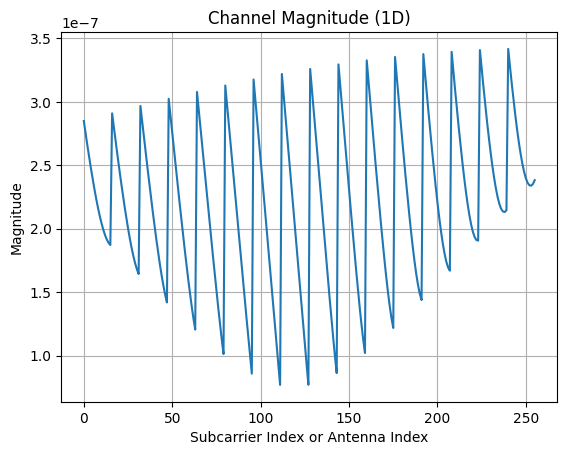

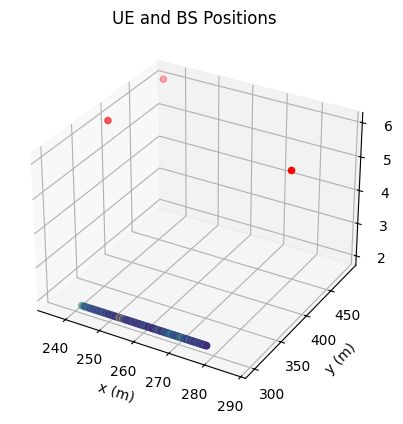

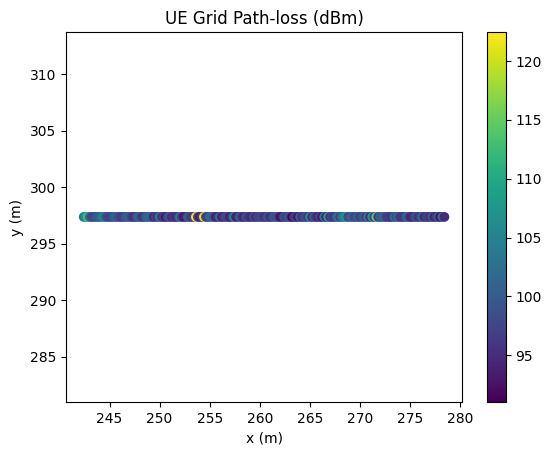

In [6]:
# -*- coding: utf-8 -*-
"""
% --- DeepMIMO Python: A Generic Dataset for mmWave and massive MIMO ----%
% Authors: Umut Demirhan
% DeepMIMO test script
% Date: 3/19/2022
"""

# # Import DeepMIMOv3 and other needed libraries for this example
import DeepMIMOv3
import numpy as np
from pprint import pprint
import matplotlib.pyplot as plt

#%% Load and print the default parameters

parameters = DeepMIMOv3.default_params()
pprint(parameters, sort_dicts=False)


#%% Change parameters for the setup

# Set scenario name
parameters['scenario'] = 'O1_28'

# Set the main folder containing extracted scenarios
parameters['dataset_folder'] = '../../O1_28'
parameters['num_paths'] = 3


parameters['active_BS'] = np.array([1, 2, 3])  # Activate BS 1,2,3

parameters['user_row_first'] = 1200
parameters['user_row_last'] = 2200
parameters['num_paths'] = 3  # Number of channel paths L=3

# OFDM settings
parameters['OFDM']['bandwidth'] = 0.1  # 100 MHz
parameters['OFDM']['subcarriers'] = 512
parameters['OFDM']['subcarriers_limit'] = 64  # Use only 64 subcarriers

parameters['bs_antenna']['shape'] = np.array([16, 16, 1])
parameters['ue_antenna']['shape'] = np.array([1, 1, 1])  # single antenna UEs




#%% Generate and inspect the dataset
dataset = DeepMIMOv3.generate_data(parameters)

# Number of basestations
len(dataset)

# Keys of a basestation dictionary
dataset[0].keys()

# Keys of a channel
dataset[0]['user'].keys()

# Number of UEs
len(dataset[0]['user']['channel'])

# Shape of the channel matrix
dataset[0]['user']['channel'].shape

# Shape of BS 0 - UE 0 channel
dataset[0]['user']['channel'][0].shape

# Path properties of BS 0 - UE 0
pprint(dataset[0]['user']['paths'][0])
ue_idx = 0
bs_idx = 0
channel = dataset[bs_idx]['user']['channel'][ue_idx]
channel_mag = np.abs(np.squeeze(channel))

print(f"Shape after squeeze: {channel_mag.shape}")

#%% Visualization of a channel matrix
plt.figure()
# Visualize channel magnitude response
# First, select indices of a user and bs
ue_idx = 0
bs_idx = 0
# Import channel
channel = dataset[bs_idx]['user']['channel'][ue_idx]



if channel_mag.ndim == 2:
    # Shape is already 2D — safe to plot
    plt.imshow(channel_mag.T, aspect='auto', origin='lower')
    plt.title('Channel Magnitude Response')
    plt.xlabel('Subcarriers')
    plt.ylabel('TX Antennas')
    plt.colorbar(label='Magnitude')
elif channel_mag.ndim == 1:
    # 1D: plot as a line
    plt.plot(channel_mag)
    plt.title('Channel Magnitude (1D)')
    plt.xlabel('Subcarrier Index or Antenna Index')
    plt.ylabel('Magnitude')
    plt.grid(True)
else:
    print("⚠️ Unexpected channel shape:", channel_mag.shape)




#%% Visualization of the UE positions and path-losses
loc_x = dataset[bs_idx]['user']['location'][:, 0]
loc_y = dataset[bs_idx]['user']['location'][:, 1]
loc_z = dataset[bs_idx]['user']['location'][:, 2]
pathloss = dataset[bs_idx]['user']['pathloss']
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
im = ax.scatter(loc_x, loc_y, loc_z, c=pathloss)
ax.set_xlabel('x (m)')
ax.set_ylabel('y (m)')
ax.set_zlabel('z (m)')

bs_loc_x = dataset[bs_idx]['basestation']['location'][:, 0]
bs_loc_y = dataset[bs_idx]['basestation']['location'][:, 1]
bs_loc_z = dataset[bs_idx]['basestation']['location'][:, 2]
ax.scatter(bs_loc_x, bs_loc_y, bs_loc_z, c='r')
ttl = plt.title('UE and BS Positions')

#%%
fig = plt.figure()
ax = fig.add_subplot()
im = ax.scatter(loc_x, loc_y, c=pathloss)
ax.set_xlabel('x (m)')
ax.set_ylabel('y (m)')
fig.colorbar(im, ax=ax)
ttl = plt.title('UE Grid Path-loss (dBm)')

In [7]:
# %% Inspecting and printing the generated data

# Print the number of basestations in the dataset
print(f"Number of Basestations: {len(dataset)}")

# Print the keys of the first basestation dictionary
print(f"Keys of the first basestation: {dataset[0].keys()}")

# Print the keys of the 'user' data structure in the first basestation
print(f"Keys of the user data structure (first BS): {dataset[0]['user'].keys()}")

# Print the number of UEs in the first basestation
num_ues = len(dataset[0]['user']['channel'])
print(f"Number of UEs in the first Basestation: {num_ues}")

# Print the shape of the channel matrix for the first UE
channel_shape = dataset[0]['user']['channel'][0].shape
print(f"Shape of the channel matrix for the first UE: {channel_shape}")

# Print the path properties of the first path for the first UE in the first basestation
print(f"Path properties of BS 0 - UE 0: {dataset[0]['user']['paths'][0]}")

# Access and print the channel data of the first BS and first UE
channel = dataset[0]['user']['channel'][0]
print(f"Channel data of BS 0 - UE 0:\n{channel}")

# Print the magnitude of the channel (abs values)
channel_mag = np.abs(np.squeeze(channel))
print(f"Channel magnitude of BS 0 - UE 0:\n{channel_mag}")

# Print the UE locations and path loss in the first basestation
loc_x = dataset[0]['user']['location'][:, 0]
loc_y = dataset[0]['user']['location'][:, 1]
loc_z = dataset[0]['user']['location'][:, 2]
pathloss = dataset[0]['user']['pathloss']

print(f"UE Locations (x, y, z) in BS 0:\n{list(zip(loc_x, loc_y, loc_z))}")
print(f"UE Pathloss values in BS 0:\n{pathloss}")

# Print the location of the basestation in the first BS
bs_loc_x = dataset[0]['basestation']['location'][:, 0]
bs_loc_y = dataset[0]['basestation']['location'][:, 1]
bs_loc_z = dataset[0]['basestation']['location'][:, 2]
print(f"Basestation location in BS 0 (x, y, z):\n{list(zip(bs_loc_x, bs_loc_y, bs_loc_z))}")


Number of Basestations: 3
Keys of the first basestation: dict_keys(['user', 'basestation', 'location'])
Keys of the user data structure (first BS): dict_keys(['paths', 'LoS', 'location', 'distance', 'pathloss', 'channel'])
Number of UEs in the first Basestation: 181
Shape of the channel matrix for the first UE: (1, 256, 1)
Path properties of BS 0 - UE 0: {'num_paths': 3, 'DoD_phi': array([ -85.7052, -100.559 ,  -85.7052], dtype=float32), 'DoD_theta': array([92.479 , 92.4464, 94.456 ], dtype=float32), 'DoA_phi': array([ 94.2948, 100.112 ,  94.2948], dtype=float32), 'DoA_theta': array([87.521 , 87.5536, 94.456 ], dtype=float32), 'phase': array([-43.7191, 129.357 , 105.981 ], dtype=float32), 'ToA': array([3.08576e-07, 3.12683e-07, 3.09222e-07], dtype=float32), 'LoS': array([1., 0., 0.], dtype=float32), 'power': array([8.4586380e-11, 6.9710765e-11, 4.3361096e-11], dtype=float32)}
Channel data of BS 0 - UE 0:
[[[-2.03552624e-08+2.84162581e-07j]
  [ 3.77828968e-08-2.72575221e-07j]
  [-5.4440

In [8]:
import numpy as np
from tqdm import tqdm

# Parameters
N = 256  # number of antennas
M = 128  # measurements
p = 4    # non-zero elements per column in A

# Function to create binary selection matrix A
def generate_binary_selection_matrix(M, N, p):
    A = np.zeros((M, N))
    for j in range(N):
        idx = np.random.choice(M, p, replace=False)
        A[idx, j] = 1
    return A

# Function to create DFT matrix for ULA
def generate_dft_matrix(N):
    n = np.arange(N)
    k = n.reshape((N, 1))
    omega = np.exp(-2j * np.pi * k * n / N)
    return omega / np.sqrt(N)

# Generate A and U matrices once
A = generate_binary_selection_matrix(M, N, p)
U = generate_dft_matrix(N)

# Storage for inputs and labels
all_inputs = []
all_labels = []

# Loop over all BSs and UEs
for bs in tqdm(dataset):
    for h_complex in bs['user']['channel']:
        h = np.squeeze(h_complex)  # (256,)
        h_beamspace = np.dot(U, h)  # (256,)
        y = np.dot(A, h_beamspace)  # (128,)
        
        # Format input channels: real, imag, amplitude, phase
        y_real = np.real(y)
        y_imag = np.imag(y)
        y_amp = np.abs(y)
        y_phase = np.angle(y)
        y_input = np.stack([y_real, y_imag, y_amp, y_phase], axis=0)  # (4, 128)
        
        # Format label: real and imag parts of ĥ
        h_label = np.stack([np.real(h_beamspace), np.imag(h_beamspace)], axis=0)  # (2, 256)
        
        all_inputs.append(y_input)
        all_labels.append(h_label)

# Convert to numpy arrays
all_inputs = np.array(all_inputs)   # shape: (num_samples, 4, 128)
all_labels = np.array(all_labels)   # shape: (num_samples, 2, 256)

print("Final input shape:", all_inputs.shape)
print("Final label shape:", all_labels.shape)


 33%|███▎      | 1/3 [00:00<00:00,  4.93it/s]

100%|██████████| 3/3 [00:00<00:00,  5.53it/s]

Final input shape: (543, 4, 128)
Final label shape: (543, 2, 256)


In [9]:
import csv
import numpy as np

# CSV file name
filename = '_dataset_UPA.csv'

# Open CSV file
with open(filename, mode='w', newline='') as file:
    writer = csv.writer(file)

    # Write header
    input_headers = [f'y_{type}_{i}' for type in ['real', 'imag', 'mag', 'phase'] for i in range(128)]
    label_headers = [f'h_{type}_{i}' for type in ['real', 'imag'] for i in range(256)]
    writer.writerow(input_headers + label_headers)


    for i in range(all_inputs.shape[0]):
        input_flat = all_inputs[i].flatten()   
        label_flat = all_labels[i].flatten()   
        writer.writerow(np.concatenate([input_flat, label_flat]))

